In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import utils

print(tf.__version__)

/home/maka/.pyenv/versions/3.6.8/envs/deep-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/maka/.pyenv/versions/3.6.8/envs/deep-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/maka/.pyenv/versions/3.6.8/envs/deep-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

2.0.0-beta1


In [2]:
cifar100 = keras.datasets.cifar100


(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
print('Train:', train_images.shape)
print('Test: ', test_images.shape)

class_names = np.array([
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
])
print('classes:', len(class_names))

Train: (50000, 32, 32, 3)
Test:  (10000, 32, 32, 3)
classes: 100


# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [3]:
def display(img):
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()

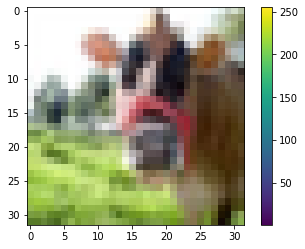

[19]
cattle


In [4]:
display(train_images[0])
label0 = train_labels[0]
print(label0)
print(class_names[label0][0])


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

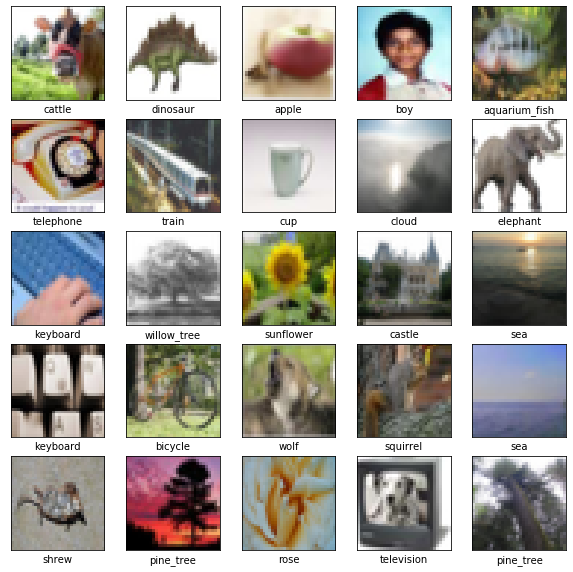

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]][0])
plt.show()

# resnet50

In [7]:
from keras import applications
resnet50 = applications.resnet50.ResNet50(
    include_top=False,
    input_shape=train_images.shape[1:],
    pooling='avg'
)
print(type(resnet50))
print(resnet50)

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
print('Properties:')
for p in utils.properties_names(resnet50):
    print('resnet50.', p, sep='')
print()

print('Inputs:')
print(resnet50.input_names, ':', resnet50.inputs)
print()

layers = resnet50._layers
print('Layers:', len(layers))
print()

print('Outputs:')
print(resnet50.output_names, ':', resnet50.outputs)

resnet50.summary()

In [ ]:
for k, v in sorted(layers[len(layers) - 1].__dict__.items()):
    print(k, ':', v)

In [ ]:
i = j = 0

stage = 0

def print_layer(i, l):
    s = '%03d' % i
    s += ': ' + type(l).__name__.ljust(22)
    s += ': ' + l.name.ljust(15)
    s += ' ({})'.format(l.dtype) if hasattr(l, 'dtype') else ''
    s += ' {}'.format(l.kernel.shape) if hasattr(l, 'kernel') else ''
    s += ' {}'.format(l.kernel_size) if hasattr(l, 'kernel_size') else ''
    s += ' {}'.format(l.batch_input_shape) if hasattr(l, 'batch_input_shape') else ''
    s += ' {}'.format(l.activation.__name__) if hasattr(l, 'activation') else ''
    print(s)
    
def print_layers(l, offset=0):
    for i, layer in enumerate(l):
        print_layer(offset + i, layer)

def print_conv_block(l):
    global i, j, stage
    stage += 1
    print()
    i = j
    j += 13 if stage == 2 else 12
    print('=============== ', stage, ': Conv Block ==========', sep='')
    print_layers(l[i:j], i)

def print_identity_block(l):
    global i, j, stage
    i = j
    j += 10
    print('=============== ', stage, ': Identity Block =======', sep='')
    print_layers(l[i:j], i)

def print_all_layers(layers):
    global i, j, stage
    i = j = 0
    print('=============== ', stage, ': Input ===============', sep='')
    print_layer(i, layers[i])

    stage += 1
    print()

    print('=============== ',stage, ': Input ===============', sep='')
    i = 1
    j = 6
    print_layers(layers[i:j], i)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)


    stage += 1
    print()
    print('=============== ', stage, ': Output ===============', sep='')
    i = j
    j = len(layers)
    print_layers(layers[i:], i)

print_all_layers(resnet50._layers)

In [ ]:
print(layers[0])
print(layers[1])
print(layers[2])
print(layers[3])
print(layers[len(layers) - 2])
print(layers[len(layers) - 1])

In [ ]:
print('tf.layers')
print(tf.layers)
print()
print('tf.keras.layers')
print(tf.keras.layers)
print()
print('keras.layers')
print(keras.layers)



# Models

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

print(type(resnet50))
#help(resnet50)

new_model = Sequential()
new_model.add(resnet50)

new_model.add(Dense(len(class_names), activation='softmax', name='fc%d' % len(class_names)))
new_model.summary()
layers = new_model._layers

In [ ]:
basic_model = keras.Sequential([
    keras.layers.Flatten(input_shape=train_images.shape[1:]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
basic_model.summary()

# Compile

In [8]:
def compile(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [9]:
compile(new_model)
compile(basic_model)

NameError: name 'new_model' is not defined

# Train

In [ ]:
def test(model):
    now = time.time()
    test_loss, test_acc = basic_model.evaluate(test_images, test_labels)
    elapsed = time.time() - now
    print('[%.3fs] Test accuracy: %s' % (elapsed, test_acc))

def predict(model):
    now = time.time()
    model.predict(test_images)
    elapsed = time.time() - now
    return elapsed

def time_predict(model, times):
    predict_times = [predict(model) for _ in range(10)]
    mean = (sum(predict_times) - min(predict_times) - max(predict_times)) / (len(predict_times) - 2)
    print('Prediction Timing: %.3fs' % mean)

def fit(model, epochs_, initial_epoch=0):
    model.fit(x=train_images, y=train_labels, epochs=epochs_, initial_epoch=initial_epoch)

def save(model, name, epochs_):
    filename = name + '_%03d.h5' % epochs_
    print('Saving %s...' % filename)
    model.save(filename)

def train(name, model, epochs_, initial_epoch=0):
    for i in range(initial_epoch + 1, epochs_ + 1):
        label = str(i) + ' ' + name
        print('~~~~~~~~~~~~~~~~~~~~ ', label, ' ~~~~~~~~~~~~~~~~~~~~', sep='')
        
        # fit
        fit(model, i, initial_epoch=i-1)
        
        # predict
        time_predict(model, 5)

        # test
        test(model)
        
        # save
        save(model, name, i)
        print('~~~~~~~~~~~~~~~~~~~~ ', '/end '.ljust(len(label) + 1, '='), '~~~~~~~~~~~~~~~~~~~~', sep='')
        print()

In [ ]:
epochs = 1
train('basic', basic_model, epochs)
train('resnet50', new_model, epochs)

In [ ]:
def representative_dataset_gen():
    for i in range(1000):
        yield [train_images[i: i + 1]]
        

# Currentry, it seems that tf.lite.TFLiteConverter does not suppert inference_input/output_type yet.
# So we have to use tf.compat.v1.lite.TFLiteConverter.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('basic_%03d.h5' % epochs)
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
with open('model.tflite', 'wb') as o_:
    o_.write(tflite_model)
    
    
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_dataset_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as o_:
#     o_.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

input_detail = interpreter.get_input_details()[0]
output_detail = interpreter.get_output_details()[0]

def quantize(real_value):
    std, mean = input_detail['quantization']
    return (real_value/std + mean).astype(np.uint8)

sample_input = quantize(test_images[0]).reshape(input_detail['shape'])

interpreter.set_tensor(input_detail['index'], sample_input)
interpreter.invoke()

original_image = test_images[0].reshape((28, 28))
pred_original_model = model.predict(test_images[:1]).reshape((28, 28))
pred_quantized_model =  interpreter.get_tensor(output_detail['index']).reshape((28, 28))

print('original_image:')
plt.imshow(original_image)
plt.show()
print('prediced by original model: ')
plt.imshow(model.predict(test_images[:1]).reshape((28, 28)))
plt.show()
print('predicted by quantized_model')
plt.imshow(pred_quantized_model.reshape((28, 28)))
plt.show()

In [ ]:
def quantize(filename):
    converter = tf.lite.TFLiteConverter.from_keras_model_file(filename)
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
    tflite_quant_model = converter.convert()
    return tflite_quant_model

In [ ]:
from keras.models import load_model

def load(filename):
    print('Loading %s...' % filename)
    return load_model(filename, custom_objects={"GlorotUniform": tf.keras.initializers.glorot_uniform})

In [ ]:
new_model_filename = 'resnet50_%03d.h5' % epochs
reloaded3 = load(new_model_filename)
test(reloaded3)

In [ ]:
test(new_model)
test(reloaded3)

In [ ]:
basic_model_filename = 'basic_%03d.h5' % epochs
quantized = quantize(basic_model_filename)
test(quantized)

In [ ]:
print(type(quantized))

In [ ]:
def representative_dataset_gen():
  data = test_images

  for _ in range(1000):
    image = data.take(1)
    yield [image]

converter = tf.lite.TFLiteConverter.from_keras_model_file(basic_model_filename)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = tf.lite.RepresentativeDataset(representative_dataset_gen)

m = converter.convert()

In [ ]:
print(basic_model_filename)

def load(filename):
    print('Loading %s...' % filename)
    return load_model(filename, custom_objects={"GlorotUniform": tf.keras.initializers.glorot_uniform})

loaded = load(new_model_filename)

# Make predictions

In [ ]:
predictions = new_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
class_names[np.argmax(predictions[0])]

In [ ]:
print(test_labels.shape)
test_labels[0]

In [ ]:
print(type(class_names))
print(class_names.shape)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = true_label[0] if true_label.shape == (1,) else true_label
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(100), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
   
    thisplot[predicted_label].set_color('red')
    thisplot.patches[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

In [ ]:
i = 0
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Now predict the image:

In [ ]:
predictions_single = new_model.predict(img)

print(predictions_single)

In [ ]:
plt.figure(figsize=(30,6))
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(100), class_names, rotation=60)
plt.show()

In [ ]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.